<a href="https://colab.research.google.com/github/gautiermarechal/titanic-scai/blob/main/Titanic_Dataset_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import de toutes les librairies nécessaires
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Challenge du titanic

Bienvenue au challenge du Titanic dans l'école d'été IA de Sorbonne Université, et du Campus des Métiers et des Qualifications.

Le dataset du titanic est un jeu de donnée très populaire afin de s'introduire à la science des données et à l'intelligence artificielle.

## Objectif principal

L'objectif de ce challenge est de prédire au mieux, basé sur un jeu de donnée existant, si un passager du Titanic a survécu ou non, dépendemment de paramètres spécifiques.

Pour effectuer ce challenge, vous n'avez pas besoin de connaitre les mathématiques derrière le processus d'entrainement des modèles.

Ici, l'objectif est de vous familiariser avec l'aspect le plus important de l'intelligence artificielle: les données. La plus grande partie du challenge consiste à manipuler les données pour les rendre les plus exploitables possible.

## Les étapes:

### 1. Définir le problème et les objectifs :

- Comprendre clairement le problème que vous essayez de résoudre.
- Définir les métriques de succès et les objectifs (par exemple, précision du modèle).

### 2. Comprendre les données :

- Analyser les données pour comprendre leur structure, qualité et caractéristiques.
- Identifier les modèles, les valeurs aberrantes et les relations au sein des données.

### 3. Prétraiter les données :

- Nettoyer les données en traitant les valeurs manquantes, les valeurs aberrantes et les doublons.
- Transformer et normaliser les données si nécessaire.
- Mixer et regrouper les datas que vous pensez cohérentes ensembles.

### Sélectionner les modèles candidats :

- Choisir un ensemble de modèles adaptés au problème.
- Voici une liste des modèles possibles:
 - Régression logistique
 - Régression linéaire
 - Forêt Aléatoire
 - kNN voisins
 - Classification naïve bayésienne
 
- Essayer d'entrainer chaque modèle différent et de voir leurs performances differentes

### Comparer les performances des modèles :

- Faire un tableau des différents modèles et de leurs performances
- Entraîner et évaluer les modèles en utilisant des métriques de performance appropriées.

### Définir le problème et les objectifs

Quel est le but de notre analyse de donnée et de notre modèle?

Nous voulons prédire si un passager va survivre ou non au crash du Titanic.

Quelles sont donc les données importantes?

### **Instructions:**  
- Ouvrez les datasets `train.csv` et `test.csv`.
- Listez toutes les colonnes différentes.
- Quels sont pour vous, les données qui pourrait influer sur la chance de survie du passager?

# Comprendre la donnée

## Visualiser la donnée

En sciences de données, il est important de toujours visualiser ce que l'on manipule.

Nous allons en premier lieu, afficher la donnée que l'on a à disposition afin de mieux comprendre le problème posé.

### Instructions

- Récupérez les données entrainement et tests des deux datasets, dans deux variables différentes.
- Affichez un tableau des 10 premiers éléments des deux datasets `train.csv` et `test.csv`

In [ ]:
# Ouverture des fichiers et lecture de la donnée à disposition

# Chemin d'accès du fichier des données des personnes (train) (données d'entrainement)
fichier_donnees_personne_enrtainement = 'data/train.csv'

# Lecture du fichier des données des personnes (train) (données d'entrainement)
dataframe_donnees_entrainement = pd.read_csv('data/train.csv')

# Affichage des 5 premières lignes du fichier des données des personnes (train) (données d'entrainement)
# print("Données d'entrainement")
# print(dataframe_donnees_entrainement.head())
# print("---------------------------------------------")

# Chemin d'accès du fichier des données des personnes (test)
fichier_donnees_personne_test = 'data/test.csv'

# Lecture du fichier des données des personnes (test)
dataframe_donnees_test = pd.read_csv('data/test.csv')

# Affichage des 5 premières lignes du fichier des données des personnes (test)
# print("Données de test")
# print(dataframe_donnees_test.head())

# Création d'une liste de données de test et d'entrainement
combinaison = [dataframe_donnees_entrainement, dataframe_donnees_test]

In [ ]:
print("Données d'entrainement")
dataframe_donnees_entrainement

Données d'entrainement


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print("Données de test")
dataframe_donnees_test

Données de test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Visualiser les colonnes du fichier des données des personnes (train) (données d'entrainement)
print("Colonnes du fichier des données des personnes (train) (données d'entrainement):")
print(dataframe_donnees_entrainement.columns.values)

Colonnes du fichier des données des personnes (train) (données d'entrainement):
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Evaluer les types de données présents

### **Instructions**

- Identifiez quelle colonne est catégorique, et quelle colonne est un nombre. 
- Par exemple: `Sex` est catégorique, `Age` est numérique
- Utilisez la fonction `info()` et `describe()` de pandas, afin d'avoir plus de précisions sur la donnée.

In [ ]:
# Infos sur le fichier des données d'entrainement
dataframe_donnees_entrainement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Description de la distribution des données d'entrainement de type numériques
dataframe_donnees_entrainement.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Description de la distribution des données d'entrainement pour les colonnes de type catégoriel
dataframe_donnees_entrainement.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Emettez des hypothèses face à cette donnée

Il est temps de regarder certains corrélations possibles.

### **Instructions:**

- Identifiez les colonnes qui ont l'air corrélées à la survie ou non d'un passager
- Quelle caractéristique a l'air d'augmenter ou de diminuer la chance de survie d'un passager?
- Choisissez les colonnes que vous pensez être les plus utiles.
- Confrontez ces colonnes avec la survie d'un passager. Regardez "Faire pivoter de la donnée" sur internet.

## Pivotez la donnée

Voici une commande pour pivoter la donnée. Remplacer <nom_colonne> par la colonne que vous voulez

In [ ]:
# dataframe_donnees_entrainement[["<nom_colonne>", 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
# Confronter la survie des personnes par la classe du billet
dataframe_donnees_entrainement[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# Confronter la survie des personnes par le sexe
dataframe_donnees_entrainement[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# Confronter la survie des personnes par le nombre de frères et soeurs ou de conjoints
dataframe_donnees_entrainement[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Confronter la survie des personnes par le nombre de parents ou d'enfants
dataframe_donnees_entrainement[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Qu'a t'on appris avec les tableaux au dessus? Quelle donnée a l'air d'être importante?

Il faut que vous émettiez des hypothèses sur quelle donnée peut être importante.

Pensez vous que le prix du billet est important dans les chances de survie?

## Trouver les corrélations

Quelle est la meilleure manière de trouver ces corrélations? Visualiser!
Nous allons produire des graphes pour nous aider à comprendre les liens de nos données que nous avons confronté précedemment.

1. Corréler les valeurs numériques
2. Corréler les valeurs catégoriques

### **Instructions:**

- Emettez au moins 2 hypothèses sur une corrélation entre la colonne et la survie.
- Distinguez les valeurs numériques des valeurs catégoriques
- Pour chaque corrélation, produisez un graphe afin de visualiser cette corrélation et la valider ou non
- Ecrivez vos observations. Vous utiliserez ces observations pour conserver les colonnes que vous avez identifié comme importante.

## Histogramme: Age vs Survived

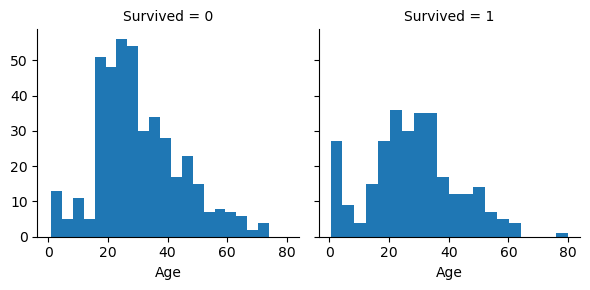

In [ ]:
g = sns.FacetGrid(dataframe_donnees_entrainement, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Histogramme: Pclass vs Survived

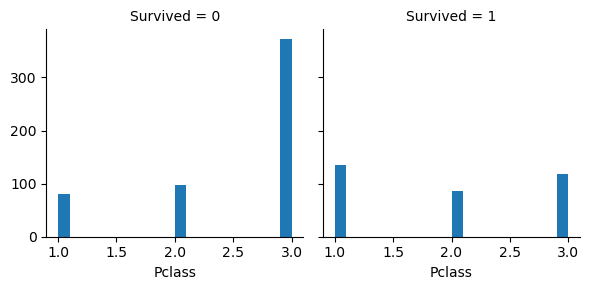

In [ ]:
g = sns.FacetGrid(dataframe_donnees_entrainement, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

## Croisement entre valeurs numériques et catégoriques

Ici nous regardons le nombre de passagers qui ont survécu ou non, classifiés par classe de billet et par leur age.

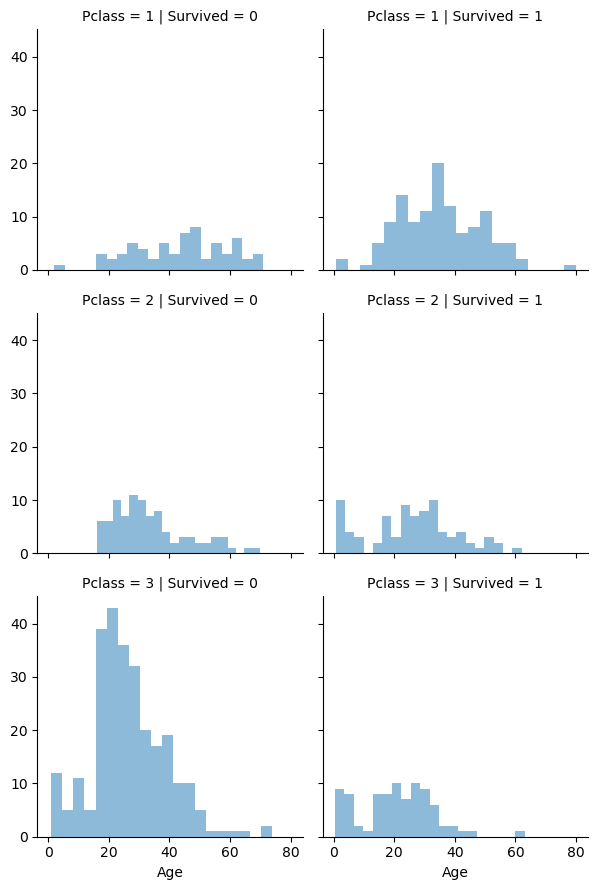

In [ ]:
grid = sns.FacetGrid(dataframe_donnees_entrainement, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

On peut observer que le nombre de survivant a l'air plus haut en class 3 et dans les âges compris entre 20 et 40.

## Corréler les valeurs catégoriques avec Survived

Regardons l'impact du Sex sur Survived. Ce graphe montre la chance de survie dépendemment du sexe, de la classe dans chaque catégorie de port d'embarcation.

/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


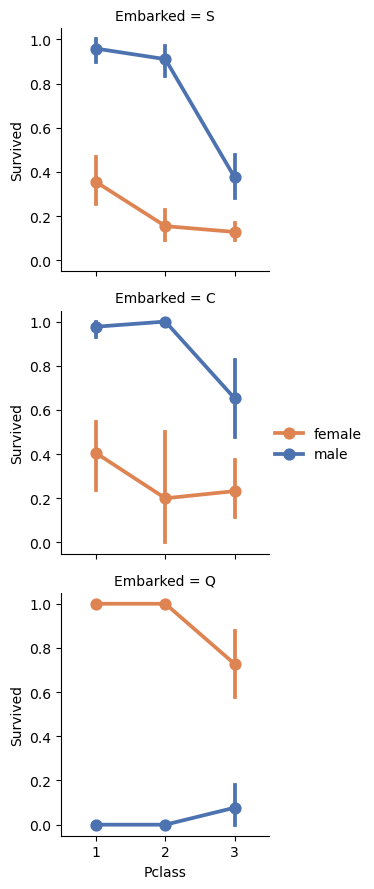

In [ ]:
grid = sns.FacetGrid(dataframe_donnees_entrainement, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Observations
Le sexe et la classe semblent être des données importantes de chance de survie.
En effet les femmes en classe 3 ont la chance la plus grande de survie.

## Vérifions si le port d'embarcation est une valeur importante

/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecat

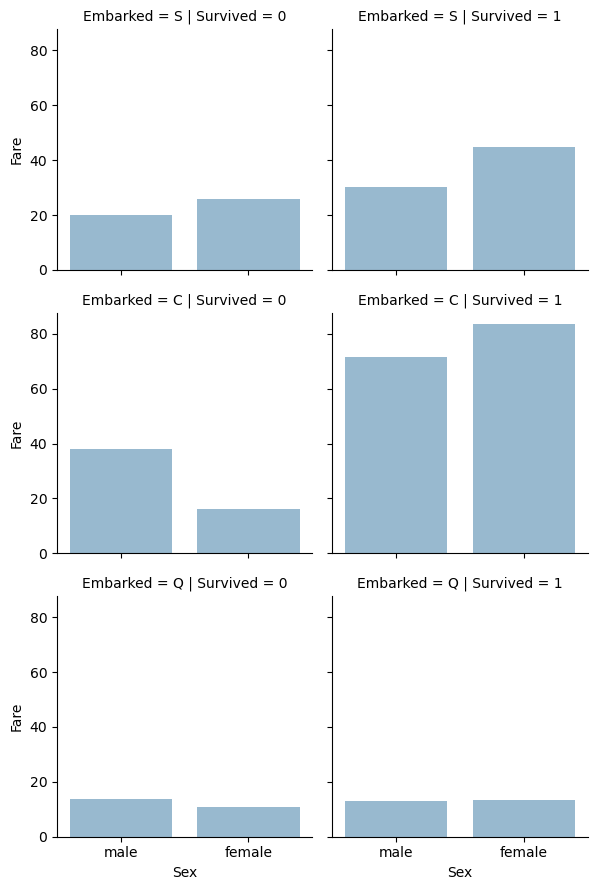

In [ ]:
grid = sns.FacetGrid(dataframe_donnees_entrainement, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Observations
On observe que les prix côté Survie sont plus hauts et que le port d'embarcation sont corrélés avec le taux de survie

## Conclusion de l'analyse de donnée

Nous avons trouvé des corrélations entre le taux de Survie et les données suivantes:

- `Age`
- `Sex`
- `Embarked`
- `Pclass`

# Préparation des données pour le modèle de prédiction

Les actions possibles:

1. Enlever la donnée inutile
2. Créer des nouvelles features. Exemple: Extraire les titres des passagers 
3. Compléter de la donnée incomplète

### **Instructions:**

- Trouvez et supprimez les colonnes que vous n'avez pas identifié comme importante
- Convertissez les données catégoriques en données numériques. Ex: Le port d'embarcation S peut être lié à la value 1, le E à la valeur 2 etc...

## Extraction de donnée inutile

`Ticket` et `Cabin` n'ont pas de corrélation avec la survie. Donc on peut les ignorer.

In [ ]:
print("Before", dataframe_donnees_entrainement.shape, dataframe_donnees_test.shape, combinaison[0].shape, combinaison[1].shape)

dataframe_donnees_entrainement = dataframe_donnees_entrainement.drop(['Ticket', 'Cabin'], axis=1)
dataframe_donnees_test = dataframe_donnees_test.drop(['Ticket', 'Cabin'], axis=1)
combinaison = [dataframe_donnees_entrainement, dataframe_donnees_test]

"After", dataframe_donnees_entrainement.shape, dataframe_donnees_test.shape, combinaison[0].shape, combinaison[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

## Nouvelle feature: le titre des passagers

Ici nous allons extraire le titre des passagers dans leurs noms et ainsi voir si une corrélation existe.

In [ ]:
for dataset in combinaison:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(dataframe_donnees_entrainement['Title'], dataframe_donnees_entrainement['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Maintenant, considérons certains de ces titres comme rare, et croisons les avec la chance de survie

In [ ]:
for dataset in combinaison:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
dataframe_donnees_entrainement[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Observations

Les titres féminins tendent un survivre davantage que les autre titres.
Le titre `Mr` semble avoir une bonne chance de survie aussi.

Nous pouvons maintenant convertir les titres de catégoriques à ordinaux

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combinaison:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

dataframe_donnees_entrainement.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Maintenant, enlevons le nom et le ID du passager car il nous sont d'aucune utilité.

## Convertir les données textuelles en données numériques

Les modèles d'IA interprètent des valeurs numériques uniquement.
Quand une image est donnée, elle est convertie en nombres. Chaque pixel représente une valeur numérique qui donnera des informations spécfifiques sur ce pixel (couleur, formes etc...).

Ici nous allons devoir faire cette conversion.
Quelles sont les valeurs que vous pensez nécessaires à convertir?


### Convertir la donnée `Sex`

In [ ]:
for dataset in combinaison:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

dataframe_donnees_entrainement.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


## Compléter les données incomplètes

Certaines données sont incomplètes et ce n'est pas l'idéal pour la précision de notre modèle.

Comment trouver les données incomplètes?
Quelles données peut-on compléter?

Nous allons compléter les données continues

Il y'a 3 méthodes pour compléter les données:

1. Génerer des nombres aléatoires entre la moyenne et l'écart-type.
2. Utiliser les corrélations que nous avons trouvé et deviner en quelques sorte la donnée possible. On peut utiliser la valeur médiane pour cela.

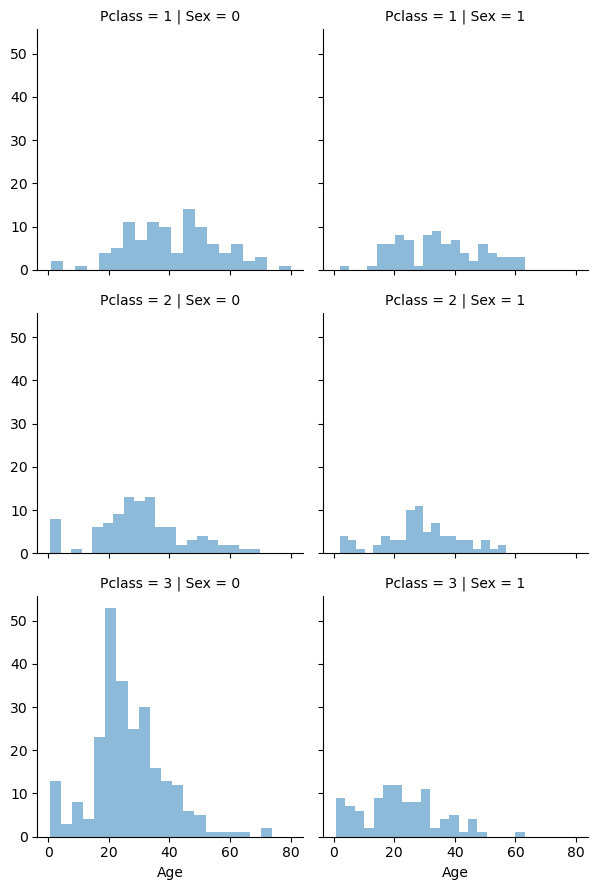

In [ ]:
grid = sns.FacetGrid(dataframe_donnees_entrainement, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
ages_devines = np.zeros((2,3))
ages_devines

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for dataset in combinaison:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            ages_devines[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = ages_devines[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

dataframe_donnees_entrainement.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S,1


In [ ]:
dataframe_donnees_entrainement['AgeBand'] = pd.cut(dataframe_donnees_entrainement['Age'], 5)
dataframe_donnees_entrainement[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/var/folders/63/t67pxlfj7c7d3f8ppk8p1pbr0000gn/T/ipykernel_4836/4224019796.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe_donnees_entrainement[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Ici nous catégorisons les fourchettes d'age en numéros pour aider notre modèle à utiliser ces données.

In [ ]:
for dataset in combinaison:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
dataframe_donnees_entrainement.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [ ]:
dataframe_donnees_entrainement = dataframe_donnees_entrainement.drop(['AgeBand'], axis=1)
combinaison = [dataframe_donnees_entrainement, dataframe_donnees_test]
dataframe_donnees_entrainement.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1


## Créer et combiner de nouvelles données

Créer une feature `FamilySize` qui regroupe `SibSp` et `Parch` pour alléger notre dataset.

In [ ]:
for dataset in combinaison:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

dataframe_donnees_entrainement[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Rajout d'une colonne `IsAlone` qui nous donnera la possiblité de supprimer `Parch`, `SibSp` et `FamilySize`

In [ ]:
for dataset in combinaison:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

dataframe_donnees_entrainement[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
dataframe_donnees_entrainement = dataframe_donnees_entrainement.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
dataframe_donnees_test = dataframe_donnees_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combinaison = [dataframe_donnees_entrainement, dataframe_donnees_test]

dataframe_donnees_entrainement.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,C,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,S,3,0
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,S,1,1


Créons une colonne artificielle croisant `Age` et `Pclass`

Comme nous savons que l'age et la classe du ticket sont deux données importantes, nous pouvons faire une sorte d'index liant les deux données.

In [ ]:
for dataset in combinaison:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

dataframe_donnees_entrainement.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Complétons une donnée catégorique

Nous observons que le port d'embarcation possède deux valeurs non définies. Nous allons donc compléter avec la valeur du port d'embarcation la plus fréquente

In [ ]:
freq_port = dataframe_donnees_entrainement.Embarked.dropna().mode()[0]
freq_port


'S'

Donc le port d'embarcation S est le plus fréquent. Nous allons le rajouter  à nos données d'entrainement

In [ ]:
for dataset in combinaison:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
dataframe_donnees_entrainement[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Maintenant, comme nous avons fait précédemment, nous pouvons assigner une valeur numérique à chaque port d'embarcation

In [ ]:
for dataset in combinaison:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

dataframe_donnees_entrainement.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,71.2833,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,53.1000,0,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,8.0500,0,1,1,6


## Complétons une données numérique

La donnée `Fare`, ou le prix du billet, contient elle aussi des cellules manquantes de données.
Nous allons donc remplir la colonne `Fare` avec la médiane des prix.

In [ ]:
dataframe_donnees_test['Fare'].fillna(dataframe_donnees_test['Fare'].dropna().median(), inplace=True)
dataframe_donnees_test.head()

/var/folders/63/t67pxlfj7c7d3f8ppk8p1pbr0000gn/T/ipykernel_4836/597400480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe_donnees_test['Fare'].fillna(dataframe_donnees_test['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2,7.8292,2,1,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,7.0000,0,3,0,6
2,894,2,"Myles, Mr. Thomas Francis",0,3,9.6875,2,1,1,6
3,895,3,"Wirz, Mr. Albert",0,1,8.6625,0,1,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,0,3,0,3


Créons des fourchettes de `Fare` comme nous avons fait avec l'age

In [ ]:
dataframe_donnees_entrainement['FareBand'] = pd.qcut(dataframe_donnees_entrainement['Fare'], 4)
dataframe_donnees_entrainement[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/var/folders/63/t67pxlfj7c7d3f8ppk8p1pbr0000gn/T/ipykernel_4836/3514191484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe_donnees_entrainement[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Avec ces fourchettes de prix, assignons une valeur numérique à chaque

In [ ]:
dataframe_donnees_entrainement.head(10)

for dataset in combinaison:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

dataframe_donnees_entrainement.head(10)

dataframe_donnees_entrainement = dataframe_donnees_entrainement.drop(['FareBand'], axis=1)
combinaison = [dataframe_donnees_entrainement, dataframe_donnees_test]
    
dataframe_donnees_entrainement.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,1,3,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,1,0,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,0,3,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,1,0,1,1,6
5,6,0,3,"Moran, Mr. James",0,1,1,2,1,1,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,3,0,1,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,2,0,4,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,1,0,3,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,2,1,3,0,0


In [ ]:
# Nous pouvons enlever la colonne Name
dataframe_donnees_entrainement = dataframe_donnees_entrainement.drop(['Name'], axis=1)
dataframe_donnees_test = dataframe_donnees_test.drop(['Name'], axis=1)

## Les datasets sont prêts

Nos deux datasets sont maintenant prêts pour entrainer notre modèle de prédiction

### Dataset d'entrainement

In [ ]:
dataframe_donnees_entrainement.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,0,0,1,0,3
1,2,1,1,1,2,3,1,3,0,2
2,3,1,3,1,1,1,0,2,1,3
3,4,1,1,1,2,3,0,3,0,2
4,5,0,3,0,2,1,0,1,1,6


### Dataset de test

In [ ]:
dataframe_donnees_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


# Création du modèle et prédictions

Maintenant que nos données sont prêtes à être utilisées, nous devons choisir le meilleur modèle possible pour prédire au mieux les données du Titanic.

### Comment choisir le meilleur modèle possible?



In [ ]:
X_train = dataframe_donnees_entrainement.drop("Survived", axis=1)
Y_train = dataframe_donnees_entrainement["Survived"]
X_test  = dataframe_donnees_test
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

### Régression Logistique

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


80.81

### kNN Voisins

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.59

### Forêt Aléatoire

In [ ]:
random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

96.97

### Classification naïve bayésienne

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

### Perceptron

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

61.73

### Comparaison de la performance de chaque modèle

#### **Instructions:**

- Construisez un tableau des performances de chaque modèle

In [ ]:
models = pd.DataFrame({
    'Model': ['Regression logistique', 'KNN voisins',
              'Forêt Aléatoire', 'Classification naïve bayésienne', 'Perceptron'],
    'Score': [acc_log, acc_knn, 
              acc_random_forest, acc_gaussian, acc_perceptron]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Forêt Aléatoire,96.97
1,KNN voisins,81.59
0,Regression logistique,80.81
3,Classification naïve bayésienne,72.28
4,Perceptron,61.73


### Fin du challenge